In [24]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

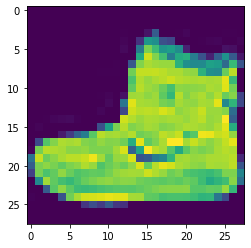

In [27]:
plt.imshow(X_train_full[0])

In [28]:
y_train_full[0]

9

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train_full[0]]

'Ankle boot'

In [9]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [10]:
X_train_n[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.34509804, 0.7372549 , 0.6745098 , 0.51764706, 0.49019608,
        0.55294118, 0.78039216, 0.56078431, 0.03529412, 0.        ,
        0.        , 0.        , 0.00392157, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.07843137, 0.51372549, 0.78039216, 0.80784314,
        0.76862745, 0.79215686, 0.94901961, 1.        , 1.        ,
        0.98039216, 0.87058824, 0.77254902, 0.80784314, 0.7372549 ,
        0.49411765, 0.06666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.1372549 , 0.83921569, 0.74901961, 0.71764706, 0.69803922,
        0.68627451, 0.65882353, 0.58823529, 0.63529412, 0.62352941,
        0.59607843, 0.6196

In [29]:
X_valid , X_train = X_train_n[:5000], X_train_n[5000:]
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [32]:
import pydot

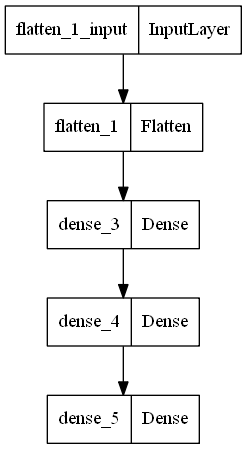

In [33]:
keras.utils.plot_model(model)

In [34]:
weights, biases = model.layers[1].get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
weights.shape

(784, 300)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [41]:
model_history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2207 - accuracy: 0.9201 - val_loss: 0.2899 - val_accuracy: 0.8940
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2174 - accuracy: 0.9214 - val_loss: 0.2936 - val_accuracy: 0.8962
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2140 - accuracy: 0.9227 - val_loss: 0.3792 - val_accuracy: 0.8640
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2104 - accuracy: 0.9253 - val_loss: 0.2951 - val_accuracy: 0.8954
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2083 - accuracy: 0.9246 - val_loss: 0.2811 - val_accuracy: 0.8956
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2032 - accuracy: 0.9271 - val_loss: 0.3035 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2006 - accuracy: 0.9294 - val_loss: 0.2926 - val_accuracy:

In [42]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
model.history.history

{'loss': [0.22068415582180023,
  0.2173633575439453,
  0.21399645507335663,
  0.21039734780788422,
  0.20833702385425568,
  0.2032424956560135,
  0.2006252557039261,
  0.19757632911205292,
  0.19380776584148407,
  0.190995991230011,
  0.18933528661727905,
  0.1845470368862152,
  0.18185697495937347,
  0.17966268956661224,
  0.17670349776744843,
  0.17401748895645142,
  0.1713583916425705,
  0.1680949181318283,
  0.1663973033428192,
  0.16278612613677979,
  0.16037385165691376,
  0.15829692780971527,
  0.15536847710609436,
  0.1526990830898285,
  0.1503288745880127,
  0.14850503206253052,
  0.14579489827156067,
  0.14409081637859344,
  0.1409846693277359,
  0.13904911279678345],
 'accuracy': [0.9200727343559265,
  0.9214363694190979,
  0.9227091073989868,
  0.9252545237541199,
  0.9246363639831543,
  0.9271454811096191,
  0.9294000267982483,
  0.9299454689025879,
  0.9301636219024658,
  0.9314363598823547,
  0.9315454363822937,
  0.9344727396965027,
  0.9357272982597351,
  0.93592727184

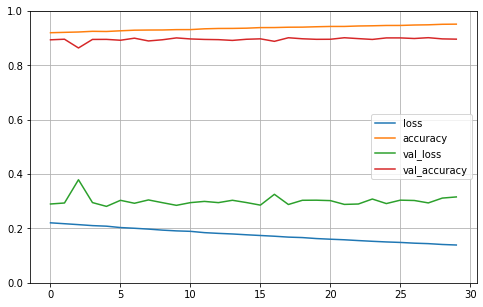

In [44]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
 model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3545 - accuracy: 0.8873


[0.35449719429016113, 0.8873000144958496]

In [46]:
X_new = X_test[:3]

In [47]:
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 88ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

AxesImage(54,36;334.8x217.44)


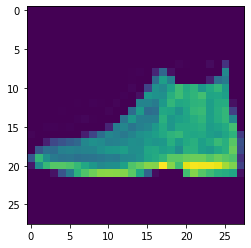

In [58]:
print(plt.imshow(X_test[0]))


AxesImage(54,36;334.8x217.44)


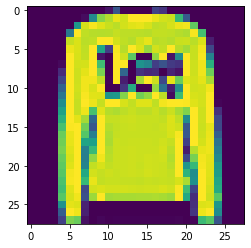

In [59]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


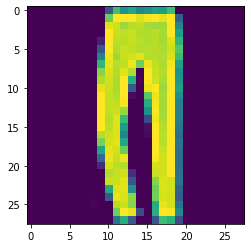

In [60]:
print(plt.imshow(X_test[2]))